In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_filebase = 'bootstrap-output-test1b'

In [3]:
with open('%s.npy' % input_filebase,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    bootstrap_weights = np.load(f)

In [4]:
train_pts.shape

(100000, 2)

In [5]:
train_det_pts

array([[ 0.39013488,  2.65056086],
       [ 0.9036598 ,  0.91956245],
       [ 0.42644889,  1.35766071],
       ...,
       [-2.10158565,  5.8157137 ],
       [-0.96850872, -0.04008578],
       [ 1.5098503 , -0.67659905]])

In [6]:
true_det_pts

array([[ 0.48819728,  0.62984238],
       [-0.54296333,  4.20650107],
       [-1.47382645,  1.42721904],
       ...,
       [ 0.06113063,  3.24600645],
       [ 1.96456326, -0.90843271],
       [ 1.132528  ,  0.09859404]])

In [7]:
true_det_pts.shape

(10000, 2)

In [8]:
bootstrap_weights

array([[0.07861238, 0.12795757, 0.08191825, ..., 0.02706999, 0.1024921 ,
        0.12486709],
       [0.08653135, 0.12601443, 0.08605371, ..., 0.03294931, 0.09962975,
        0.13069938],
       [0.08095153, 0.12954304, 0.0831295 , ..., 0.02869027, 0.08845292,
        0.13174871],
       ...,
       [0.07892848, 0.14781836, 0.08111504, ..., 0.03369312, 0.1114796 ,
        0.14261661],
       [0.08155078, 0.13032903, 0.08369369, ..., 0.02565151, 0.10471409,
        0.12774353],
       [0.08183833, 0.13605663, 0.08456939, ..., 0.02789115, 0.10248567,
        0.13594753]])

In [9]:
bootstrap_weights.shape

(100, 100000)

In [10]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 55

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


<function matplotlib.pyplot.show(close=None, block=None)>

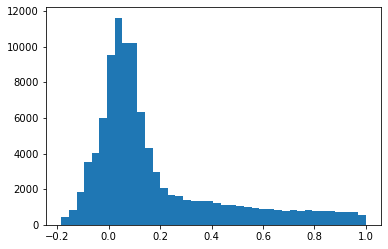

In [11]:
plt.hist( corr_array, bins=40)
plt.show

In [12]:
train_pts[point_index]

array([0.57226839, 1.72971604])

In [13]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

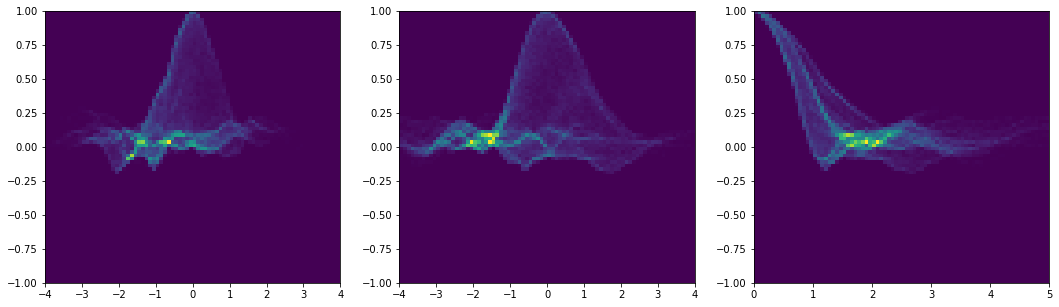

In [14]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [33]:
%%time

npoints = 400
ncalc = len(bootstrap_weights[0])


for point_index in range(npoints) :
    
    print(" Working on point %3d" % point_index)
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if point_index == 0 :
        all_points_df0 = train_pts[:,0] - train_pts[point_index,0]
        all_points_df1 = train_pts[:,1] - train_pts[point_index,1]
        all_points_dr = np.sqrt( all_points_df0*all_points_df0 + all_points_df1*all_points_df1)
        all_points_corr_array = this_point_corr_array
    else :
        this_point_df0 = train_pts[:,0] - train_pts[point_index,0]
        this_point_df1 = train_pts[:,1] - train_pts[point_index,1]  
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 + this_point_df1*this_point_df1 )
        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_df1 = np.append( all_points_df1, this_point_df1 )
        all_points_dr = np.append( all_points_dr, this_point_dr )
        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)


 Working on point   0
 Working on point   1
 Working on point   2
 Working on point   3
 Working on point   4
 Working on point   5
 Working on point   6
 Working on point   7
 Working on point   8
 Working on point   9
 Working on point  10
 Working on point  11
 Working on point  12
 Working on point  13
 Working on point  14
 Working on point  15
 Working on point  16
 Working on point  17
 Working on point  18
 Working on point  19
 Working on point  20
 Working on point  21
 Working on point  22
 Working on point  23
 Working on point  24
 Working on point  25
 Working on point  26
 Working on point  27
 Working on point  28
 Working on point  29
 Working on point  30
 Working on point  31
 Working on point  32
 Working on point  33
 Working on point  34
 Working on point  35
 Working on point  36
 Working on point  37
 Working on point  38
 Working on point  39
 Working on point  40
 Working on point  41
 Working on point  42
 Working on point  43
 Working on point  44
 Working o

 Working on point 373
 Working on point 374
 Working on point 375
 Working on point 376
 Working on point 377
 Working on point 378
 Working on point 379
 Working on point 380
 Working on point 381
 Working on point 382
 Working on point 383
 Working on point 384
 Working on point 385
 Working on point 386
 Working on point 387
 Working on point 388
 Working on point 389
 Working on point 390
 Working on point 391
 Working on point 392
 Working on point 393
 Working on point 394
 Working on point 395
 Working on point 396
 Working on point 397
 Working on point 398
 Working on point 399
CPU times: user 36min 36s, sys: 23.4 s, total: 37min
Wall time: 36min 52s


In [34]:
all_points_corr_array.shape

(40000000,)

<function matplotlib.pyplot.show(close=None, block=None)>

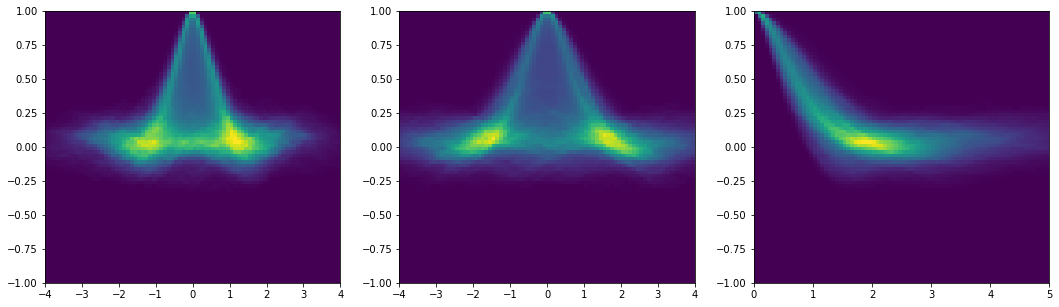

In [35]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,5],[-1,1]))

plt.savefig('correlation-vs-distance.png', bbox_inches='tight')
plt.savefig('correlation-vs-distance.pdf', bbox_inches='tight')

plt.show

## Rerun OmniFold for these samples

In [18]:
import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="1"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [19]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-27 14:45:13.684679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:45:13.702140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:45:13.702361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:45:13.706024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:45:13.706213: I tensorflow/compiler/xla/stream_executo

In [20]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

In [21]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-27 14:45:15.453935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 14:45:15.456540: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6f7e8f8d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 14:45:15.456553: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-27 14:45:15.460119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 14:45:15.550437: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 21ms/step - loss: 0.7315 - accuracy: 0.5153 - val_loss: 0.6214 - val_accuracy: 0.4549
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.5670 - accuracy: 0.4545 - val_loss: 0.4902 - val_accuracy: 0.4547
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4475 - accuracy: 0.4545 - val_loss: 0.3893 - val_accuracy: 0.4547
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.4545 - val_loss: 0.3355 - val_accuracy: 0.4547
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.4545 - val_loss: 0.3254 - val_accuracy: 0.4547
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3279 - accuracy: 0.4545 - val_loss: 0.3253 - val_accuracy: 0.4547
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.4545 - val_loss: 0.3216 - val_accuracy: 0.4547
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.3814 - val_loss: 0.1311 - val_accuracy: 0.3905
Epoch 19/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1308 - accuracy: 0.3947 - val_loss: 0.1311 - val_accuracy: 0.4024
Epoch 20/20
10/10 [==============================] - 0s 657us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2005 - accuracy: 0.2507 - val_loss: 0.1652 - val_accuracy: 0.2502
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.2499 - val_loss: 0.1650 - val_accuracy: 0.2502
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.2499 - val_loss: 0.1651 - val_accuracy: 0.2502
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.2499 - val_loss: 0.1650 - val_accuracy: 0.2502
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1648 

75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1642 - val_accuracy: 0.2505
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1642 - val_accuracy: 0.2505
Epoch 16/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1642 - val_accuracy: 0.2505
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1642 - val_accuracy: 0.2505
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1641 - val_accuracy: 0.2505
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.2498 - val_loss: 0.1641 - val_accuracy: 0.2505
Epoch 20/20
10/10 [==============================] - 0s 707us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 15ms

<function matplotlib.pyplot.show(close=None, block=None)>

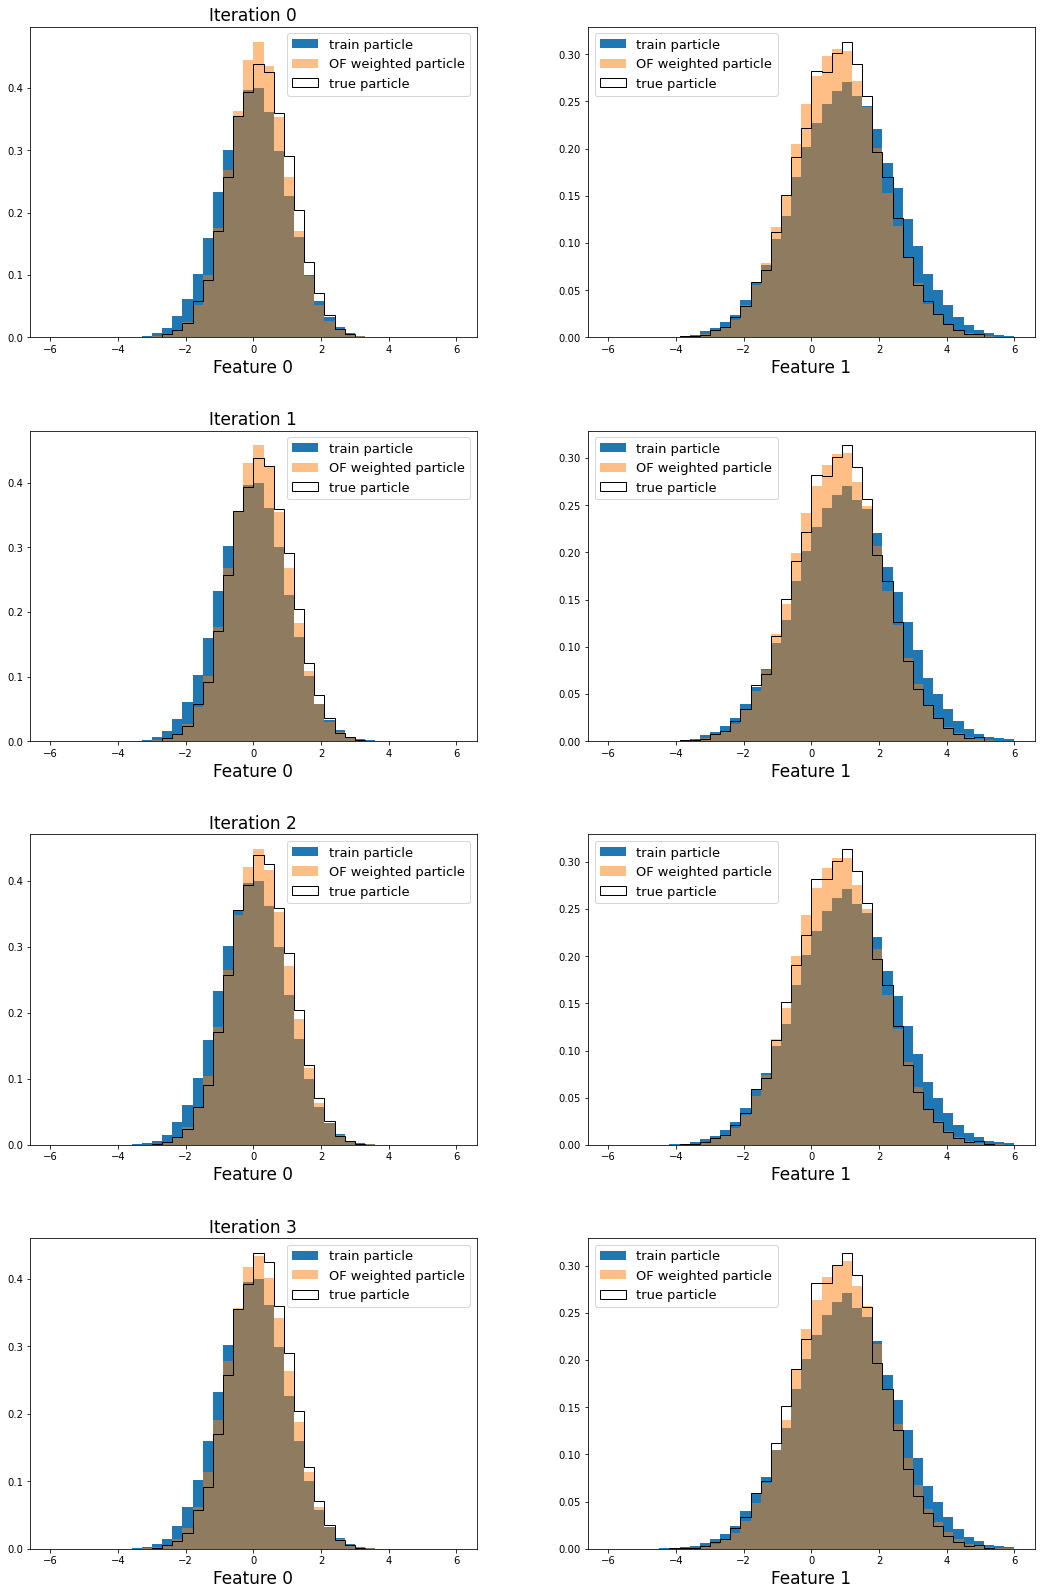

In [22]:

fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show